In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

def hypothesis(X, w_1,b_1): 

    h= softmax(np.dot(X, w_1)+b_1)
    return h 
  
# function to compute gradient of error function 
def gradient(X, y, w_1,b_1): 
    h = hypothesis(X, w_1,b_1)
    grad_soft = np.zeros([X.shape[0],10])
    for i in range(X.shape[0]):
        label = np.argmax(y[i])
        grad_soft[i] = -1*h[i]
        grad_soft[i][label] = (1-h[i][label])
    grad_w = np.dot(X.transpose(), grad_soft) 
    grad_b = np.sum(grad_soft,axis = 0)
    return grad_w, grad_b

  
# function to create a list containing mini-batches 
def create_mini_batches(X, y, batchsize): 
    mini_batches = [] 
    n_minibatches = X.shape[0] // batchsize 
    i = 0
  
    for i in range(n_minibatches): 
        X_mini = X[i*batchsize:(i+1)*batchsize] 
        Y_mini = y[i*batchsize:(i+1)*batchsize] 
        mini_batches.append((X_mini, Y_mini)) 
    if X.shape[0] % batchsize != 0: 
        X_mini = X[i*batchsize: X.shape[0]]
        Y_mini = y[i*batchsize: X.shape[0]]
        mini_batches.append((X_mini, Y_mini)) 
    return mini_batches 
  
def sigmoid(x):
     return 1/(1+np.exp(-x))
    
def softmax(x):
    x = x - np.max(x,axis =1).reshape(-1,1)
    exp_x = np.exp(x)
    softmax_x = exp_x / np.sum(exp_x,axis =1).reshape(-1,1)
    return softmax_x


def relu(x):
    return np.maximum(0,x)

def relu_diff(x):
    if x >0 :
        return float(1)
    else :
        return float(0)
    
def cross_entropy(y_pred,y_label) :
    loss = 0
    datasize = y_pred.shape[0]
    for q in range(10):
        for j in range(datasize):
            if y_label[j][q] == 1:
                loss += -1*math.log(y_pred[j][q])
    loss = round(loss/datasize,2)
    return loss

def accuracy(y_pred,y_label) :
    datasize = y_pred.shape[0]
    error = 0
    for j in range(datasize):
        if np.argmax(y_pred[j]) != np.argmax(y_label[j]) :
            error += 1
    acc = round(100*(datasize-error)/datasize ,2)
    return acc

def train(x,y_label,w_1,b_1,batch_size,valid_split,epoch,lr):
    datasize = x.shape[0]
    learning_curve_train =[]
    learning_curve_valid =[]
    loss_curve_train =[]
    loss_curve_valid =[]
    trainsize = int(datasize*(1-valid_split))
    validsize = int(datasize*valid_split)
    for i in range(epoch):
        if i != 0:
            per = np.random.permutation(x.shape[0])
            x = x[per, :]
            y_label = y_label[per,:]
        print('epoch : ', i+1)
        mini_batches = create_mini_batches(x, y_label, batch_size) 
        for mini_batch in mini_batches: 
            X_mini, y_mini = mini_batch 
            grad_w, grad_b = gradient(X_mini, y_mini, w_1,b_1) 
            w_1 = w_1 + lr *grad_w
            b_1 = b_1 + lr *grad_b


        y_predict_train = softmax(np.dot(x[:trainsize],w_1)+b_1)
        y_predict_valid = softmax(np.dot(x[trainsize:],w_1)+b_1)
            
            
        acc_train = accuracy(y_predict_train,y_label[:trainsize])
        acc_valid = accuracy(y_predict_valid,y_label[trainsize:])
        learning_curve_train.append(acc_train)
        learning_curve_valid.append(acc_valid)
        print('accuracy_train : ', acc_train,'%')
        print('accuracy_validation : ', acc_valid,'%')
        loss_train = cross_entropy(y_predict_train,y_label[:trainsize])
        loss_valid = cross_entropy(y_predict_valid,y_label[trainsize:])
        loss_curve_train.append(loss_train)
        loss_curve_valid.append(loss_valid)
        print("loss_train",loss_train)
        print("loss_validation",loss_valid)
        if acc_valid > 93.5 :                     #stop criterion
            epoch = i+1
            print(i)
            break
        
    e = list(range(1,epoch+1))
    plt.subplot(121)
    plt.plot(e,learning_curve_train,label='train',color ='b')
    plt.plot(e,learning_curve_valid,label ='validation',color ='r')
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel('accuracy', fontsize = 12)
    plt.legend(loc="lower right")
    plt.subplot(122)
    plt.plot(e,loss_curve_train,label ='train',color ='b')
    plt.plot(e,loss_curve_valid,label='validation',color = 'r')
    plt.xlabel('epoch', fontsize = 12)
    plt.ylabel('loss', fontsize = 12)
    plt.legend(loc="upper right")
    plt.subplots_adjust(wspace =1, hspace =0)
    plt.show()
    
    
    return w_1,b_1



In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
train_x = mnist.train.images
train_y = mnist.train.labels
test_x = mnist.test.images
test_y = mnist.test.labels

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


epoch :  1
accuracy_train :  85.67 %
accuracy_validation :  87.03 %
loss_train 0.47
loss_validation 0.43
epoch :  2
accuracy_train :  88.46 %
accuracy_validation :  88.65 %
loss_train 0.39
loss_validation 0.39
epoch :  3
accuracy_train :  89.76 %
accuracy_validation :  89.61 %
loss_train 0.36
loss_validation 0.35
epoch :  4
accuracy_train :  90.36 %
accuracy_validation :  90.05 %
loss_train 0.34
loss_validation 0.35
epoch :  5
accuracy_train :  90.65 %
accuracy_validation :  90.6 %
loss_train 0.33
loss_validation 0.34
epoch :  6
accuracy_train :  90.79 %
accuracy_validation :  90.88 %
loss_train 0.32
loss_validation 0.32
epoch :  7
accuracy_train :  91.03 %
accuracy_validation :  91.35 %
loss_train 0.32
loss_validation 0.31
epoch :  8
accuracy_train :  91.31 %
accuracy_validation :  91.09 %
loss_train 0.31
loss_validation 0.32
epoch :  9
accuracy_train :  91.42 %
accuracy_validation :  91.49 %
loss_train 0.3
loss_validation 0.31
epoch :  10
accuracy_train :  91.46 %
accuracy_validation

loss_train 0.25
loss_validation 0.25
epoch :  79
accuracy_train :  93.23 %
accuracy_validation :  93.15 %
loss_train 0.24
loss_validation 0.26
epoch :  80
accuracy_train :  93.15 %
accuracy_validation :  93.24 %
loss_train 0.25
loss_validation 0.25
epoch :  81
accuracy_train :  93.1 %
accuracy_validation :  93.41 %
loss_train 0.25
loss_validation 0.24
epoch :  82
accuracy_train :  93.2 %
accuracy_validation :  93.45 %
loss_train 0.25
loss_validation 0.24
epoch :  83
accuracy_train :  93.21 %
accuracy_validation :  92.95 %
loss_train 0.25
loss_validation 0.25
epoch :  84
accuracy_train :  93.1 %
accuracy_validation :  93.57 %
loss_train 0.25
loss_validation 0.24
epoch :  85
accuracy_train :  93.1 %
accuracy_validation :  93.37 %
loss_train 0.25
loss_validation 0.25
epoch :  86
accuracy_train :  93.23 %
accuracy_validation :  93.35 %
loss_train 0.25
loss_validation 0.25
epoch :  87
accuracy_train :  93.22 %
accuracy_validation :  93.12 %
loss_train 0.25
loss_validation 0.24
epoch :  88
a

loss_train 0.24
loss_validation 0.24
epoch :  156
accuracy_train :  93.5 %
accuracy_validation :  93.36 %
loss_train 0.23
loss_validation 0.25
epoch :  157
accuracy_train :  93.34 %
accuracy_validation :  93.68 %
loss_train 0.24
loss_validation 0.23
epoch :  158
accuracy_train :  93.43 %
accuracy_validation :  93.75 %
loss_train 0.24
loss_validation 0.23
epoch :  159
accuracy_train :  93.36 %
accuracy_validation :  93.81 %
loss_train 0.24
loss_validation 0.23
epoch :  160
accuracy_train :  93.53 %
accuracy_validation :  93.46 %
loss_train 0.24
loss_validation 0.24
epoch :  161
accuracy_train :  93.44 %
accuracy_validation :  93.36 %
loss_train 0.24
loss_validation 0.24
epoch :  162
accuracy_train :  93.47 %
accuracy_validation :  93.79 %
loss_train 0.24
loss_validation 0.23
epoch :  163
accuracy_train :  93.5 %
accuracy_validation :  93.53 %
loss_train 0.24
loss_validation 0.24
epoch :  164
accuracy_train :  93.41 %
accuracy_validation :  93.59 %
loss_train 0.24
loss_validation 0.23
ep

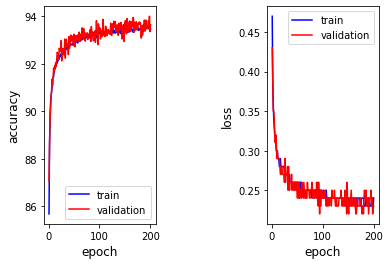

In [3]:
#np.seterr(divide='ignore', invalid='ignore')
#W_1 = np.ones([784,10])
W_1 = np.random.rand(784,10)
b_1 = np.random.rand(1,10)




w1_train,b1_train= train(train_x,train_y,W_1,b_1,100,0.2,200,0.001)

In [5]:
y_predict = softmax(np.dot(test_x,w1_train)+b1_train)
acc = accuracy(y_predict,test_y)

print('accuracy : ', acc,'%')    

accuracy :  92.6 %
